In [3]:

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pydicom
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from IPython.display import update_display
from subprocess import Popen
PATH = "/mnt/d/Datasets/CBIS-DDSM/"
imgPATH = PATH + "manifest-ZkhPvrLo5216730872708713142/"
ROI_PATH = '/mnt/d/Datasets/Vindr-Mammo/ROI/'
roi_path = PATH + "ROI/"
save = roi_path + 'augmented/'
# malignant_roi_path = PATH + "ROI/malignant/"
# fullimg_benign_path = PATH + "fullimg/benign/"
# fullimg_malignant_path = PATH + "fullimg/malignant/"
image_size=300
img_height=300
img_width=300
output_size=300
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(1,1))

2023-02-20 23:22:27.532908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 23:22:28.086341: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jj/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/jj/miniconda3/envs/tf/lib/
2023-02-20 23:22:28.086416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugi

In [4]:
# for dirName, subdirList, fileList in os.walk(imgPATH):
    # for fname in fileList:
        # if fname.endswith('.dcm'):
            # dcm_path = dirName+'/'+fname
            # img_path = dirName+'/'+fname.replace('.dcm','.png')
            # Popen(['convert',dcm_path,img_path]).wait()

In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation((0,0.2),fill_mode='reflect'),
  tf.keras.layers.RandomZoom(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2),fill_mode='reflect'),
  tf.keras.layers.RandomTranslation(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),fill_mode='reflect')
  ])

2023-02-20 23:22:28.634541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 23:22:28.636063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-20 23:22:28.636115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-20 23:22:28.636131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

In [6]:
calc_test = pd.read_csv(PATH + "calc_case_description_test_set.csv")
calc_train = pd.read_csv(PATH + "calc_case_description_train_set.csv")
mass_test = pd.read_csv(PATH + "mass_case_description_test_set.csv")
mass_train = pd.read_csv(PATH + "mass_case_description_train_set.csv")
calc_test = calc_test[['patient_id','left_or_right_breast','image_view','pathology','calc_type',]]
calc_train = calc_train[['patient_id','left_or_right_breast','image_view','pathology','calc_type']]
mass_test = mass_test[['patient_id','left_or_right_breast','image_view','pathology','mass_shape']]
mass_train = mass_train[['patient_id','left_or_right_breast','image_view','pathology','mass_shape']]

In [7]:
# calc_coarse = calc_train.loc[calc_train['calc_type']=='PUNCTATE']
# calc_coarse_benign = calc_coarse.loc[calc_train['pathology']=='BENIGN']
# calc_coarse_benign = calc_coarse.loc[calc_train['pathology']=='BENIGN']
# calc_coarse_benign
calc_coarse =  calc_train.groupby(['calc_type'])
# print(calc_coarse.get_group('PLEOMORPHIC'))
# keysList = [key for key in  calc_coarse.groups.keys()
arrays = {}

# loop through the groups
for name, group in calc_coarse:
    # convert the group to an arr['patient_id','left_or_right_breast','image_view','pathology','calc_type']d append to the list
    # print(group)
    arrays[name] = np.array(group)

# print the arrays
for name, array in arrays.items():
    print(name)

print(arrays['COARSE'][0][0])

AMORPHOUS
AMORPHOUS-PLEOMORPHIC
AMORPHOUS-ROUND_AND_REGULAR
COARSE
COARSE-LUCENT_CENTER
COARSE-PLEOMORPHIC
COARSE-ROUND_AND_REGULAR
COARSE-ROUND_AND_REGULAR-LUCENT_CENTER
COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED
DYSTROPHIC
EGGSHELL
FINE_LINEAR_BRANCHING
LARGE_RODLIKE
LARGE_RODLIKE-ROUND_AND_REGULAR
LUCENT_CENTER
LUCENT_CENTER-PUNCTATE
LUCENT_CENTERED
MILK_OF_CALCIUM
PLEOMORPHIC
PLEOMORPHIC-FINE_LINEAR_BRANCHING
PLEOMORPHIC-PLEOMORPHIC
PUNCTATE
PUNCTATE-AMORPHOUS
PUNCTATE-FINE_LINEAR_BRANCHING
PUNCTATE-LUCENT_CENTER
PUNCTATE-PLEOMORPHIC
PUNCTATE-ROUND_AND_REGULAR
ROUND_AND_REGULAR
ROUND_AND_REGULAR-AMORPHOUS
ROUND_AND_REGULAR-EGGSHELL
ROUND_AND_REGULAR-LUCENT_CENTER
ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE
ROUND_AND_REGULAR-LUCENT_CENTERED
ROUND_AND_REGULAR-PLEOMORPHIC
ROUND_AND_REGULAR-PUNCTATE
ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS
SKIN
SKIN-COARSE-ROUND_AND_REGULAR
SKIN-PUNCTATE
SKIN-PUNCTATE-ROUND_AND_REGULAR
VASCULAR
VASCULAR-COARSE
VASCULAR

/tmp/ipykernel_2627/643294894.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in calc_coarse:


# function

In [59]:
def preprocess(file_path):
    data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # data = clahe.apply(data)
    other_pixels = cv2.countNonZero(data)
    # Calculate the concentration of black pixels
    total_pixels = data.shape[0] * data.shape[1]
    concentration = (total_pixels - other_pixels) / total_pixels
    print(concentration)
    if concentration > 0.7 :
        new_file_path = file_path.replace('1-1.png','1-2.png')
        if os.path.exists(new_file_path):
            data = cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
            avail =True
        else : 
            avail = False
    if avail:
        img=cv2.resize(data,(img_width,img_height))
    else:
        img = data
    return img

def process_image(file_path,data_set,category,file_save,augment=False):
    data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # data = clahe.apply(data)
    other_pixels = cv2.countNonZero(data)
    # Calculate the concentration of black pixels
    total_pixels = data.shape[0] * data.shape[1]
    concentration = (total_pixels - other_pixels) / total_pixels
    avail=True
    if concentration > 0.7 :
        new_file_path = file_path.replace('1-1.png','1-2.png')
        if os.path.exists(new_file_path):
            data = cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
            avail =True
        else : 
            avail = False
    if avail:
        # data = cv2.medianBlur(data,5)
        # data = clahe.apply(data)
        ret,thresh = cv2.threshold(data,1,255,0)
        contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        if contours:
          largest_contours = max(contours, key=cv2.contourArea)
          x,y,w,h = cv2.boundingRect(largest_contours)
          if w>50 and h>50:
            data = data[y:y+h,x:x+w]
        ret,thresh = cv2.threshold(data,254,255,0)
        contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        if contours:
          largest_contours = max(contours, key=cv2.contourArea)
          x,y,w,h = cv2.boundingRect(largest_contours)
          if w< data.shape[1]/2:
            if x+w == data.shape[1]:
              data = data[:,:data.shape[1]-w]
            elif x == 0:
              data = data[:,w:]
          if h< data.shape[0]/2:
            if y+h == data.shape[0]:
              data = data[:data.shape[1]-h,:]
            elif y == 0:
              data = data[h:,:]
        data = cv2.normalize(data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        # data = global_contrast_normalization(data)
        img=cv2.resize(data,(img_width,img_height))
        save_path = str(save) + str(data_set) +'/'+str(category)+'/'+str(file_save)
        print(save_path) 
        directory= str(save) + str(data_set) +'/'+str(category)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(save_path+'_1.png',img)
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        if augment:
            for i in range(augment):
                img2 = data_augmentation(img)    
                cv2.imwrite(save_path+'_'+str(i+2)+'.png',img2.numpy())

In [10]:
calc_train_malignant = []
mass_train_malignant = []
calc_train_benign = []
mass_train_benign =[]

In [11]:
for dirName, subdirList, fileList in os.walk(imgPATH):
    if 'ROI' in dirName.split('/')[-1] or 'cropped' in dirName.split('/')[-1]:
        for fname in fileList:
            if fname == '1-1.png':
                info = dirName.split('/')[-3].split('_')
                mam_type = info[0].split('-')
                if mam_type[0] == 'Calc':
                    if mam_type[1] == 'Test':
                        data_set = 'test'
                        data = calc_test
                    else:
                        data_set = 'train'
                        data = calc_train
                elif mam_type[0] == 'Mass':
                    if mam_type[1] == 'Test':
                        data_set = 'test'
                        data = mass_test
                    else:
                        data_set = 'train'
                        data = mass_train
                else: print(str(info) + ' is invalid.')
                patient = 'P_' + str(info[2])
                patient_data = data.loc[data['patient_id']==patient]
                side = patient_data.loc[patient_data['left_or_right_breast']==info[3]]
                view = side.loc[side['image_view']==info[4]]
                category = view['pathology'].to_numpy()
                if category[0] == 'MALIGNANT':
                    if data_set == 'train':
                        if mam_type[0] == 'Calc':
                            calc_train_malignant.append(patient)
                        else:
                            mass_train_malignant.append(patient)
                elif category[0] == 'BENIGN':
                    if data_set == 'train':
                        if mam_type[0] == 'Calc':
                            calc_train_benign.append(patient)
                        else:
                            mass_train_benign.append(patient)

         

In [12]:
rng = np.random.default_rng(seed=42)
calc_train_malignant= rng.permutation(calc_train_malignant)
calc_train_benign= rng.permutation(calc_train_benign)
mass_train_malignant= rng.permutation(mass_train_malignant)
mass_train_benign= rng.permutation(mass_train_benign)
# val_set = []
# val_set = val_set.extend(train_benign[:-int(0.2*len(train_benign))])
# print(val_set)
# val_set = val_set.extend(train_malignant[:-int(0.2*len(train_malignant))])
val_set = np.concatenate((  calc_train_benign[:int(0.15*len(calc_train_malignant))],
                            calc_train_malignant[:int(0.15*len(calc_train_malignant))],
                            mass_train_benign[:int(0.15*len(mass_train_malignant))],
                            mass_train_malignant[:int(0.15*len(mass_train_malignant))],
                            ))
# train_benign = train_benign[:len(train_malignant)]
train_set = np.concatenate((  calc_train_benign[int(0.15*len(calc_train_malignant)):],
                            calc_train_malignant[int(0.15*len(calc_train_malignant)):],
                            mass_train_benign[int(0.15*len(mass_train_malignant)):],
                            mass_train_malignant[int(0.15*len(mass_train_malignant)):],
                            ))
random_aug = np.concatenate((  
            calc_train_malignant[:int(0.15*len(calc_train_malignant))],
            mass_train_malignant[:int(0.15*len(mass_train_malignant))],
            ))
random_aug = rng.permutation(random_aug)
val_random_aug = random_aug[:10]
random_aug = np.concatenate((  
            calc_train_malignant[int(0.15*len(calc_train_malignant)):],
            mass_train_malignant[int(0.15*len(mass_train_malignant)):],
            ))
random_aug = rng.permutation(random_aug)
train_random_aug = random_aug[:200]

In [13]:
# len(mass_train_malignant[int(0.2*len(mass_train_malignant)):])
print(len(calc_train_malignant)+len(mass_train_malignant))


1199


# ROI


In [14]:
# Remove images with annotations and other things that can affect the training
ignore_id = []
for dirName, subdirList, fileList in os.walk(roi_path+'Need_revise/'):
    for fname in fileList:
        if fname.endswith('.png'):
            ignore_id.append('_'.join(fname.split('.')[0].split('_')[:-1]))
print(ignore_id)

['P_00639_LEFT_MLO_1', 'P_01006_LEFT_CC_1', 'P_01006_LEFT_MLO_1', 'P_01414_RIGHT_CC_1', 'P_01414_RIGHT_MLO_1', 'P_00194_RIGHT_MLO_1', 'P_00646_LEFT_CC_1', 'P_00962_RIGHT_CC_1', 'P_00962_RIGHT_MLO_1', 'P_01546_LEFT_MLO_1', 'P_00091_LEFT_CC_1', 'P_00106_LEFT_MLO_1', 'P_00328_LEFT_MLO_1', 'P_00385_RIGHT_CC_2', 'P_00385_RIGHT_MLO_1', 'P_00385_RIGHT_MLO_2', 'P_00395_RIGHT_CC_3', 'P_00395_RIGHT_MLO_1', 'P_00529_LEFT_MLO_1', 'P_00708_RIGHT_CC_1', 'P_00816_RIGHT_MLO_1', 'P_00863_RIGHT_CC_1', 'P_00927_LEFT_CC_1', 'P_00955_RIGHT_MLO_1', 'P_00963_LEFT_MLO_1', 'P_01082_RIGHT_MLO_1', 'P_01146_LEFT_CC_1', 'P_01408_LEFT_CC_4', 'P_01440_RIGHT_CC_1', 'P_01440_RIGHT_MLO_1', 'P_01446_LEFT_MLO_1', 'P_01567_LEFT_MLO_1', 'P_01620_RIGHT_MLO_1', 'P_01635_LEFT_CC_1', 'P_01635_RIGHT_CC_1', 'P_01635_RIGHT_MLO_1', 'P_01838_LEFT_MLO_6', 'P_01838_LEFT_MLO_7', 'P_00068_RIGHT_MLO_1', 'P_00101_RIGHT_CC_2', 'P_00110_LEFT_CC_1', 'P_00128_LEFT_CC_1', 'P_00199_LEFT_CC_1', 'P_00199_LEFT_MLO_1', 'P_00236_RIGHT_MLO_1', 'P_00

In [60]:
val_patient_mal = 0
val_patient_ben = 0
for dirName, subdirList, fileList in os.walk(imgPATH):
    if 'ROI' in dirName.split('/')[-1] or 'cropped' in dirName.split('/')[-1]:
        for fname in fileList:
            if fname == '1-1.png':
                info = dirName.split('/')[-3].split('_')
                mam_type = info[0].split('-')
                if mam_type[0] == 'Calc':
                    if mam_type[1] == 'Test':
                        data_set = 'test'
                        data = calc_test
                    else:
                        data_set = 'train'
                        data = calc_train
                elif mam_type[0] == 'Mass':
                    if mam_type[1] == 'Test':
                        data_set = 'test'
                        data = mass_test
                    else:
                        data_set = 'train'
                        data = mass_train
                else: print(str(info) + ' is invalid.')
                patient = 'P_' + str(info[2])
                patient_data = data.loc[data['patient_id']==patient]
                side = patient_data.loc[patient_data['left_or_right_breast']==info[3]]
                view = side.loc[side['image_view']==info[4]]
                category = view['pathology'].to_numpy()
                augment = False
                if category[0] == 'MALIGNANT':
                    category = 'malignant'
                    if data_set == 'train':
                        if patient in val_set:
                            if val_patient_mal < 200:
                                data_set= 'val'
                                val_patient_mal += 1
                            else:
                                data_set='train'
                            if patient in val_random_aug:
                                augment = 1
                        # elif patient in train_set:
                            # if patient in train_random_aug:
                                # augment = 1                              
                if category[0] == 'BENIGN':
                    category = 'benign'
                    if data_set == 'train':
                        if patient in val_set:
                            if val_patient_ben < 200:
                                data_set= 'val'
                                val_patient_ben += 1
                            else:
                                data_set='train'
                file_save = '_'.join(info[1:])
                if file_save not in ignore_id:
                    process_image(dirName+'/'+fname,data_set,category,file_save,augment)


            

/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/['BENIGN_WITHOUT_CALLBACK' 'BENIGN_WITHOUT_CALLBACK']/P_00562_LEFT_MLO_2
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/['BENIGN_WITHOUT_CALLBACK']/P_00562_RIGHT_CC_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/['BENIGN_WITHOUT_CALLBACK']/P_00562_RIGHT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/malignant/P_00570_LEFT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00579_LEFT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00589_LEFT_CC_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00589_LEFT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00608_LEFT_CC_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00608_LEFT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/benign/P_00620_LEFT_CC_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/malignant/P_00643_LEFT_CC_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/malignant/P_00643_LEFT_MLO_1
/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/test/malignan

In [25]:
calc_test = pd.read_csv(PATH + "calc_case_description_test_set.csv")
calc_train = pd.read_csv(PATH + "calc_case_description_train_set.csv")
mass_test = pd.read_csv(PATH + "mass_case_description_test_set.csv")
mass_train = pd.read_csv(PATH + "mass_case_description_train_set.csv")
metadata = pd.read_csv(imgPATH + "metadata.csv")

In [26]:
calc_train_study_id = calc_train.ROI_mask_file_path.to_numpy()
calc_test_study_id = calc_test.ROI_mask_file_path.to_numpy()
mass_train_study_id = mass_train.ROI_mask_file_path.to_numpy()
mass_test_study_id = mass_test.ROI_mask_file_path.to_numpy()
calc_test_study_id = [i.split('/')[2] for i in calc_test_study_id]
calc_train_study_id = [i.split('/')[2] for i in calc_train_study_id]
mass_test_study_id = [i.split('/')[2] for i in mass_test_study_id]
mass_train_study_id = [i.split('/')[2] for i in mass_train_study_id]
calc_train_study_id_2 = calc_train.cropped_image_file_path.to_numpy()
calc_test_study_id_2 = calc_test.cropped_image_file_path.to_numpy()
mass_train_study_id_2 = mass_train.cropped_image_file_path.to_numpy()
mass_test_study_id_2 = mass_test.cropped_image_file_path.to_numpy()
calc_test_study_id_2 = [i.split('/')[2] for i in calc_test_study_id_2]
calc_train_study_id_2 = [i.split('/')[2] for i in calc_train_study_id_2]
mass_test_study_id_2 = [i.split('/')[2] for i in mass_test_study_id_2]
mass_train_study_id_2 = [i.split('/')[2] for i in mass_train_study_id_2]
calc_train_pathology = calc_train.pathology.to_numpy()
calc_test_pathology = calc_test.pathology.to_numpy()
mass_train_pathology = mass_train.pathology.to_numpy()
mass_test_pathology = mass_test.pathology.to_numpy()

In [27]:
def list_find(list=[], input=''):
    for y in list:
        for i,x in enumerate(y):
            if x == input:
                list_index = i
                return int(list_index)
    
    return print(input+' not found')

    
    


In [28]:
study_uid = metadata.Series_UID.to_numpy()
file_location = metadata.File_Location.to_numpy()
image_type = metadata.Series_Description.to_numpy()


In [29]:
# def read_monochrome1:

def ROI(image,img_h=0,img_w=0,xmin=0,xmax=0,ymin=0,ymax=0,save_path=None,size=300,monochrome=2):

    # data = pydicom.dcmread(image)
    # data = data.pixel_array.astype(float)
    data = (np.maximum(image,0)/image.max())*127.0
    data = np.uint8(data)
    # if xmin<0: xmin=0
    # if xmax>img_w: xmax=img_w
    # if ymin<0: ymin=0
    # if ymax>img_h: ymax=img_h
    # data = data[int(ymin):int(ymax),int(xmin):int(xmax)]
    if monochrome == 1:
        data = np.invert(data)
    data = clahe.apply(data)
    data = cv2.medianBlur(data,3)
    
    data = cv2.resize(data,(size,size))
    cv2.imwrite(save_path+'.png',data)



In [30]:
# print(study_uid[1])
# print(calc_train_study_id[344])
# Category = mass_test_pathology[list_find([mass_test_study_id,mass_test_study_id_2],'1.3.6.1.4.1.9590.100.1.2.423283243012912888204847591923699853302')]
# Category

In [31]:
# file = '/'.join(file_location[0].split('\\')[1:])
# for dirName, subdirList, fileList in os.walk(imgPATH+file):
#     for fname in fileList:
#         data = pydicom.dcmread(imgPATH+file+'/'+fname)
#         print(data.SeriesDescription == 'cropped images')

In [32]:
# ROIs = np.where(image_type =='ROI mask images')[0]
# x = ROIs[0]
# file_dir = '/'.join(file_location[x].split('\\')[1:])
# for dirName, subdirList, fileList in os.walk(imgPATH+file_dir):
#     row = 3000
#     for file in fileList:
#         print(imgPATH+file_dir+'/'+file)
#         data = pydicom.dcmread(imgPATH+file_dir+'/'+file)
#         print(data)
#         row_new = data.Rows
#         if row_new < row:
#             row = row_new
#             image = data.pixel_array.astype(float)
#             if data.PhotometricInterpretation == 'MONOCHROME 1':monochrome = 1
#             else: monochrome =2

In [33]:
ignore_id = []
for dirName, subdirList, fileList in os.walk(roi_path+'To_be_revised/'):
    for fname in fileList:
        if fname.endswith('.png'):
            ignore_id.append(fname.split('.')[0])
print(ignore_id)

['P_00288_RIGHT_CC_1', 'P_00293_LEFT_MLO_1', 'P_00328_LEFT_MLO_1', 'P_00336_LEFT_MLO_1', 'P_00337_LEFT_CC_1', 'P_00337_LEFT_MLO_1', 'P_00376_RIGHT_MLO_1', 'P_00376_RIGHT_MLO_2', 'P_00377_LEFT_CC_1', 'P_00476_RIGHT_CC_1', 'P_00539_RIGHT_CC_2', 'P_00539_RIGHT_CC_3', 'P_00539_RIGHT_CC_4', 'P_00539_RIGHT_MLO_1', 'P_00539_RIGHT_MLO_2', 'P_00539_RIGHT_MLO_3', 'P_00539_RIGHT_MLO_4', 'P_00573_RIGHT_MLO_1', 'P_00578_LEFT_MLO_1', 'P_00665_LEFT_MLO_1', 'P_00759_LEFT_MLO_2', 'P_00846_LEFT_CC_1', 'P_00846_LEFT_MLO_1', 'P_00862_LEFT_MLO_1', 'P_00906_LEFT_MLO_1', 'P_00916_RIGHT_MLO_1', 'P_01084_LEFT_MLO_3', 'P_01262_RIGHT_MLO_3']


In [34]:
Progress_display = display("0% completed",display_id="Progress_display")
ROIs = np.where(image_type =='ROI mask images')[0]
for i,x in enumerate(ROIs):
    file_type = file_location[x].split('\\')[2].split('_')[0].split('-')
    if file_type[0]=='Calc':
        if file_type[1] == 'Training':
            Category = calc_train_pathology[list_find([calc_train_study_id,calc_train_study_id_2],study_uid[x])]
            train_test_split = 'train'
        else:
            Category = calc_test_pathology[list_find([calc_test_study_id,calc_test_study_id_2],study_uid[x])]
            train_test_split = 'test'
    if file_type[0]=='Mass':
        if file_type[1] == 'Training':
            Category = mass_train_pathology[list_find([mass_train_study_id,mass_train_study_id_2],study_uid[x])]
            train_test_split = 'train'
        else:
            Category = mass_test_pathology[list_find([mass_test_study_id,mass_test_study_id_2],study_uid[x])]
            train_test_split = 'test'
    file_dir = '/'.join(file_location[x].split('\\')[1:])
    row = 3000
    for dirName, subdirList, fileList in os.walk(imgPATH+file_dir):
        for file in fileList:
            data = pydicom.dcmread(imgPATH+file_dir+'/'+file)
            row_new = data.Rows
            if row_new < row:
                row = row_new
                image = data.pixel_array.astype(float)
                if data.PhotometricInterpretation == 'MONOCHROME 1':monochrome = 1
                else: monochrome =2
    patient = '_'.join(file_location[x].split('\\')[2].split('_')[1:6])
    if Category == "BENIGN" or Category == "BENIGN_WITHOUT_CALLBACK":
        category = 'benign'
    elif Category == "MALIGNANT":
        category = 'malignant'
    if patient not in ignore_id:
        ROI(image,save_path=roi_path+train_test_split+'/'+category+'/'+patient,monochrome=monochrome,size=300)
    update_display(str(int(i/len(ROIs)*100))+"% completed",display_id="Progress_display")
    # update_display(str(int(i))+" completed",display_id="Progress_display")
    
                
    

'3560 completed'

In [46]:
Progress_display = display("0% completed",display_id="Progress_display")
for i,x in enumerate(category):
    if str(x) != "nan" and finding_category[i] != "['No Finding']":
        image_path=str(imgPATH+filename[i]+'/'+img_id[i]+".dicom")
        save_path = filename[i] + "_" + view[i] + "_" + side[i] + ".png"
        if monochrome[np.where(meta_img_id==img_id[i])] == 'MONOCHROME1':MONOCHROME = 1
        else:MONOCHROME = 2
        if x.split(" ")[1] == '3':
            if tran_test_split[i] =='training':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"train/benign/"+save_path),300,MONOCHROME)
            elif tran_test_split[i] =='test':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"test/benign/"+save_path),300,MONOCHROME)
            else:
                print("Error occured with image "+str(img_id[i]))
        elif x.split(" ")[1] == '4' or x.split(" ")[1] =='5':
            if tran_test_split[i] =='training':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"train/malignant/"+save_path),300,MONOCHROME)
            elif tran_test_split[i] =='test':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"test/malignant/"+save_path),300,MONOCHROME)
            else:
                print("Error occured with image "+str(img_id[i])) 
        else:
            print("Error occured with image "+str(img_id[i]))
    update_display(str(int(i/len(category)*100))+"% completed",display_id="Progress_display")
update_display("completed",display_id="Progress_display")
    

'completed'

# Testing

In [28]:
def global_contrast_normalization(image, scale=1.0, subtract_mean=True, use_std=True, sqrt_bias=1e-6):
    """
    Apply global contrast normalization to an image.
    Args:
        image (numpy.ndarray): input image.
        scale (float): scaling factor for normalized values.
        subtract_mean (bool): whether to subtract mean of image values.
        use_std (bool): whether to divide by standard deviation of image values.
        sqrt_bias (float): factor to prevent division by zero.
    Returns:
        numpy.ndarray: normalized image.
    """
    if subtract_mean:
        image = image - np.mean(image)

    if use_std:
        image = image / np.sqrt(np.var(image) + sqrt_bias)

    return scale * image

296
8


True

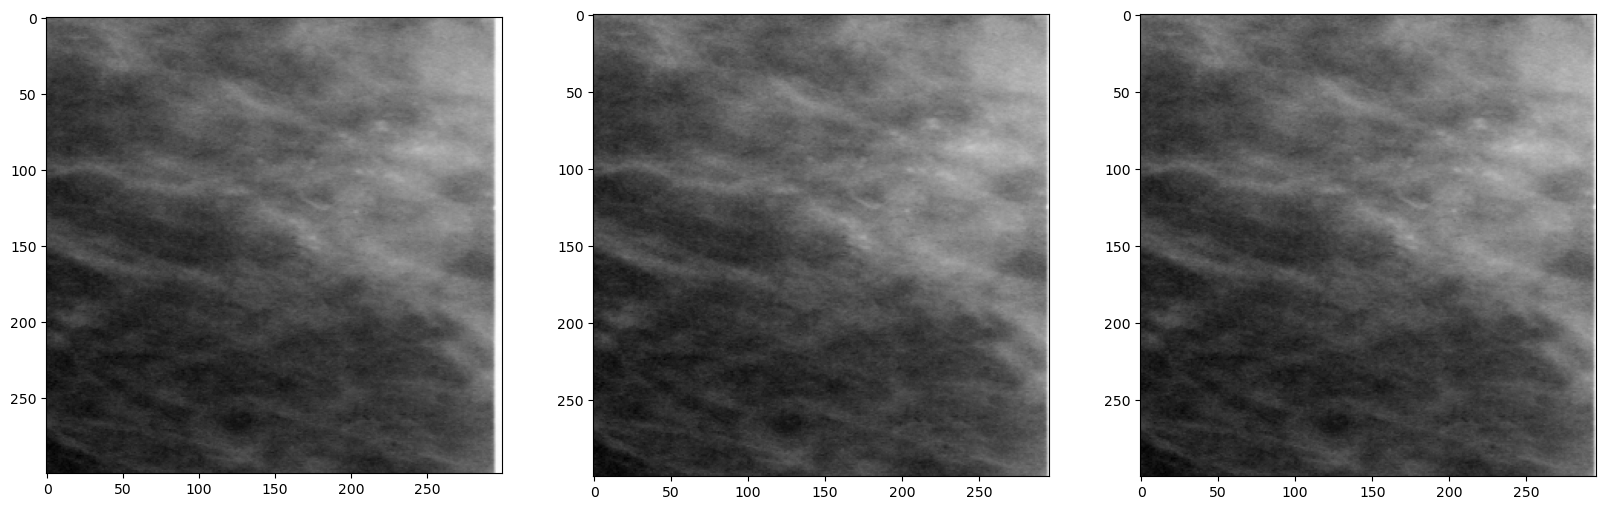

In [52]:
plt.figure(figsize=(20,60))
data = cv2.imread('/mnt/d/Datasets/CBIS-DDSM/ROI/augmented/train/malignant/P_01198_RIGHT_CC_1_1.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(131)
plt.imshow(data,cmap='gray')
# data = global_contrast_normalization(data,scale=1,sqrt_bias=10,use_std=True)
# print(data)
ret,thresh = cv2.threshold(data,250,255,0)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
if contours:
  # cnt = contours[-1]
  largest_contours = max(contours, key=cv2.contourArea)
  x,y,w,h = cv2.boundingRect(largest_contours)
  print(x)
  # img = cv2.drawContours(data,[cnt],0,(255,255,255),2)
#   if w>10 and h>10:
  if x+w == data.shape[1]:
    data = data[:,:data.shape[1]-w]
  # elif x-w == 0:
    # data = data[y:y+h,w:]
# data = cv2.normalize(data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
# print(data.min())
plt.subplot(132)
plt.imshow(data,cmap='gray')
# data = np.interp(data,(data.min(),data.max()),(0,255)).astype(dtype=np.uint8)
print(data.min())
# testclahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(1,1))
data = cv2.normalize(data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
# data = testclahe.apply(data)
plt.subplot(133)
plt.imshow(data,cmap='gray')
cv2.imwrite('/mnt/d/Datasets/CBIS-DDSM/testing1.png',data)

In [59]:
np.where(img_id == "523cdecbef6f4fa9ec4c49ead52846ba" )

(array([2094, 2095]),)

(3580, 2812)


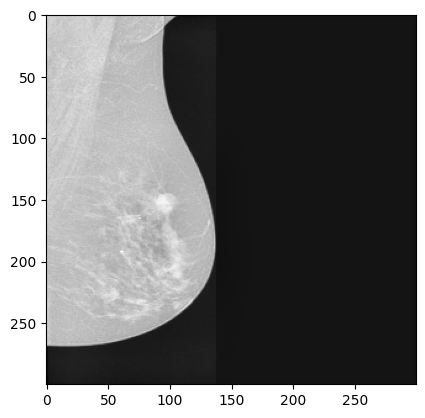

In [58]:
data = pydicom.dcmread(imgPATH+"afa015c6fcf47f108939c6663af44990/523cdecbef6f4fa9ec4c49ead52846ba.dicom")
# data = pydicom.dcmread(imgPATH+filename[0]+'/'+img_id[0]+".data")
data = data.pixel_array.astype(float)
data = (np.maximum(data,0)/data.max())*255.0

data = np.uint8(data)
# # # data = cv2.medianBlur(data,3)
# data = np.invert(data)
print(data.shape)

# data = data[int(mask_y_min[20140]):int(mask_y_max[20140]),int(mask_x_min[20140]):int(mask_x_max[20140])]
data = clahe.apply(data)
data = cv2.resize(data,(300,300))
plt.imshow(data, cmap="gray")

# cv2.imwrite(PATH+"test.png",data)